In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from enstop import PLSA
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora

# Fetch dataset
news = fetch_20newsgroups(subset='all')
texts = news.data

# Preprocess the documents for Gensim coherence calculation
processed_docs = [doc.lower().split() for doc in texts]  # Simple preprocessing

# Create a dictionary and corpus for Gensim
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Train pLSA model
vectorizer = CountVectorizer()
data = vectorizer.fit_transform(texts)
model = PLSA(n_components=20).fit(data)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Extract top N words for each topic
top_n = 10
topics = []
for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[-top_n:][::-1]
    top_features = [feature_names[i] for i in top_features_ind]
    topics.append(top_features)

# Calculate Coherence
coherence_model = CoherenceModel(topics=topics, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence = coherence_model.get_coherence()

print('Coherence Score:', coherence)


c:\Users\bhull\anaconda3\envs\247proj\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Coherence Score: 0.4173735200269252


In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from enstop import PLSA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
news = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
texts = news.data
labels = news.target

# Vectorize texts
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(texts)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Train pLSA model on training data
plsa = PLSA(n_components=20, random_state=42)
plsa.fit(X_train)

# Transform both training and testing sets to topic distributions
X_train_topics = plsa.transform(X_train)
X_test_topics = plsa.transform(X_test)

# Train a classifier on the training set topic distributions
classifier = LogisticRegression(random_state=42, max_iter=1000)
classifier.fit(X_train_topics, y_train)

# Predict labels for the testing set
y_pred = classifier.predict(X_test_topics)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.4883289124668435


In [1]:
############### SVD ###################

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in stop_words]
    return ' '.join(tokens)

# Load dataset
news = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
texts = [preprocess(text) for text in news.data]
labels = news.target

# Vectorization and model training pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2)),
    ('svd', TruncatedSVD(n_components=100, random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Parameter grid for grid search
param_grid = {
    'svd__n_components': [50, 100, 200],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
}

# Grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Predict labels for the testing set
y_pred = grid_search.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')


[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhull\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhull\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Best parameters: {'clf__max_depth': None, 'clf__n_estimators': 200, 'svd__n_components': 200}
Accuracy: 0.6074270557029178


In [9]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=news.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.45      0.49      0.47       151
           comp.graphics       0.48      0.46      0.47       202
 comp.os.ms-windows.misc       0.57      0.51      0.54       195
comp.sys.ibm.pc.hardware       0.47      0.55      0.51       183
   comp.sys.mac.hardware       0.66      0.52      0.58       205
          comp.windows.x       0.65      0.72      0.68       215
            misc.forsale       0.69      0.66      0.68       193
               rec.autos       0.44      0.66      0.53       196
         rec.motorcycles       0.49      0.61      0.54       168
      rec.sport.baseball       0.78      0.69      0.73       211
        rec.sport.hockey       0.81      0.81      0.81       198
               sci.crypt       0.79      0.64      0.71       201
         sci.electronics       0.54      0.46      0.49       202
                 sci.med       0.62      0.78      0.69       194
         

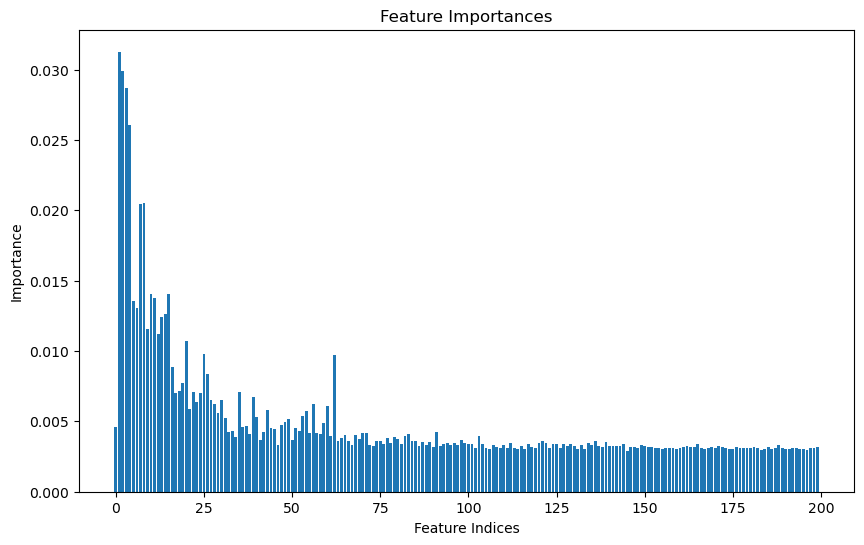

In [4]:
# Assuming grid_search is your fitted GridSearchCV object
best_pipeline = grid_search.best_estimator_

# Now, you can access the RandomForestClassifier from the best_pipeline
rf_classifier = best_pipeline.named_steps['clf']

# Feature importances
feature_importances = rf_classifier.feature_importances_

# Plotting the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel("Feature Indices")
plt.ylabel("Importance")
plt.show()


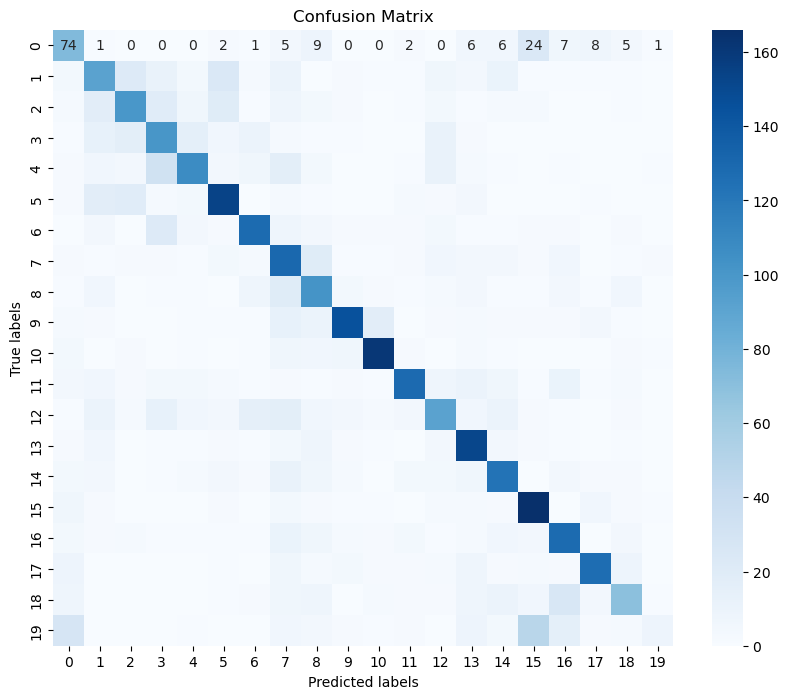

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined from your model's predictions
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [3]:
from sklearn.base import BaseEstimator, TransformerMixin
from enstop import PLSA

class PLSATransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=100):
        self.model = None
        self.n_components = n_components

    def fit(self, X, y=None):
        self.model = PLSA(n_components=self.n_components)
        self.model.fit(X)
        return self

    def transform(self, X, y=None):
        transformed = self.model.transform(X)
        return transformed

In [4]:
##################### pLSA #####################

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Pipeline setup
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words='english', max_df=0.5, min_df=2)),
    ('plsa', PLSATransformer(n_components=100)),
    ('clf', RandomForestClassifier(random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'plsa__n_components': [50, 100, 150],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
}

# Grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')


Best parameters: {'clf__max_depth': None, 'clf__n_estimators': 200, 'plsa__n_components': 100}
Accuracy: 0.5915119363395226


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Pipeline setup with LDA for dimensionality reduction
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words='english', max_df=0.5, min_df=2)),
    ('lda', LatentDirichletAllocation(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

# Assuming `texts` and `labels` are already defined and preprocessed
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)


# Define parameter grid for grid search
param_grid = {
    'lda__n_components': [10, 15, 20, 25],
    'lda__learning_decay': [0.5, 0.7, 0.9],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
}

# Grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')


Best parameters: {'clf__max_depth': 20, 'clf__n_estimators': 200, 'lda__learning_decay': 0.5, 'lda__n_components': 25}
Accuracy: 0.44482758620689655
